# BCA Credit Scoring

In [1]:
def kacrut(nama) :
    print('hello ' + nama)

test = { 'kucrat': kacrut }

In [2]:
test['kucrat']('Baron')

hello Baron


In [3]:
kuras = [test, kacrut]

In [4]:
kuras[0]['kucrat']('Karimun')

hello Karimun


In [5]:
kuras[1]('Test')

hello Test


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

%matplotlib inline

In [7]:
train = pd.read_csv('npl_train.csv').rename(columns={'X': 'id'})
pd.set_option('display.max_columns', None)
train.head()

,id,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
0,1,2,36158,7000000.0,23437.0,0.0,94.0,26323.0,I,102.19,0.0,74.78,100.00,0,0,15.416667,94.0,13161.5,0.003760,0.000013,0.011719,0.017810,0.013228,0.021949
1,2,2,268691,10000000.0,254564.0,0.0,1012.0,0.0,A,0.00,0.0,0.00,0.00,0,0,0.750000,1012.0,0.0,0.000000,0.000101,0.000000,0.000000,0.004232,0.000300
2,3,3,6769149,28000000.0,4159779.0,0.0,0.0,0.0,A,100.00,0.0,100.00,100.91,0,0,10.750000,0.0,0.0,0.000000,0.000000,0.040518,0.047703,0.249389,0.267853
3,4,4,3496732,21000000.0,111231.0,0.0,2536660.0,581334.0,G,100.00,0.0,25.01,22.64,0,0,19.750000,2536660.0,145333.5,0.027683,0.120793,0.055971,0.016851,0.101912,0.346635
4,5,2,9402085,10000000.0,6099283.0,0.0,2666558.0,5951865.0,A,95.99,0.0,97.49,99.84,0,0,1.666667,2666558.0,2975932.5,0.595186,0.266656,0.323027,0.131162,0.707865,0.336571


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15493 entries, 0 to 15492
Data columns (total 24 columns):
id                                     15493 non-null int64
jumlah_kartu                           15493 non-null int64
outstanding                            15493 non-null int64
limit_kredit                           15493 non-null float64
tagihan                                15493 non-null float64
total_pemakaian_tunai                  15493 non-null float64
total_pemakaian_retail                 15493 non-null float64
sisa_tagihan_tidak_terbayar            15493 non-null float64
kode_cabang                            15393 non-null object
rasio_pembayaran                       15493 non-null float64
persentasi_overlimit                   15493 non-null float64
rasio_pembayaran_3bulan                15493 non-null float64
rasio_pembayaran_6bulan                15493 non-null float64
skor_delikuensi                        15493 non-null int64
flag_kredit_macet               

In [9]:
train.describe()

,id,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
count,15493.000000,15493.000000,1.549300e+04,1.549300e+04,1.549300e+04,1.549300e+04,1.549300e+04,1.549300e+04,15493.00000,15493.000000,15493.000000,15493.000000,15493.000000,15493.000000,15493.000000,1.549300e+04,1.549300e+04,15493.000000,15493.000000,15493.000000,15493.000000,15493.000000,15493.000000
mean,7747.000000,2.506551,1.159833e+07,2.079833e+07,8.078663e+06,7.453291e+04,2.025857e+06,8.140875e+06,64.64712,3.343533,50.530351,81.666238,0.004776,0.087717,6.634093,2.100421e+06,2.968060e+06,0.468246,0.109362,0.167446,0.202609,0.571102,0.533719
std,4472.588196,1.012655,2.408569e+07,2.955334e+07,1.761286e+07,6.184139e+05,7.927677e+06,1.922430e+07,794.16940,9.241921,1327.275247,1467.822452,0.114088,0.282892,4.675454,8.092612e+06,6.262192e+06,0.473056,0.200159,0.192327,0.274293,0.411928,0.432350
min,1.000000,1.000000,0.000000e+00,3.000000e+06,2.004300e+04,0.000000e+00,-1.566720e+07,0.000000e+00,-18138.00000,0.000000,-57792.340000,-77056.000000,0.000000,0.000000,0.750000,-1.566720e+07,0.000000e+00,0.000000,-0.632000,-0.126000,-0.569000,0.000288,0.000000
25%,3874.000000,2.000000,2.000551e+06,5.000000e+06,8.182500e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.000000,20.200000,21.600000,0.000000,0.000000,2.920000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.035200,0.032900,0.189000,0.155000
50%,7747.000000,2.000000,4.726943e+06,9.000000e+06,3.145857e+06,0.000000e+00,2.010420e+05,2.750923e+06,27.00000,0.000000,50.000000,65.600000,0.000000,0.000000,5.666667,2.480000e+05,1.209318e+06,0.335000,0.022100,0.108000,0.117000,0.575000,0.496000
75%,11620.000000,3.000000,1.064848e+07,2.200000e+07,7.404991e+06,0.000000e+00,1.398000e+06,7.143198e+06,100.00000,1.060000,91.370000,100.000000,0.000000,0.000000,9.330000,1.512235e+06,3.088477e+06,0.930000,0.128000,0.239000,0.285000,0.917000,0.863000
max,15493.000000,16.000000,7.980586e+08,1.000000e+09,6.280000e+08,2.884057e+07,2.850000e+08,4.440000e+08,68983.00000,190.000000,75575.000000,54899.000000,5.000000,1.000000,34.416667,3.140000e+08,1.480000e+08,7.240000,4.600000,3.490000,8.110000,8.125671,9.730000


In [10]:
listItem = []
for col in train.columns :
    listItem.append([col, train[col].dtype, train[col].isna().sum(), round((train[col].isna().sum()/len(train[col])) * 100,2),
                    train[col].nunique(), list(train[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,id,int64,0,0.00,15493,"[4008, 11557]"
1,jumlah_kartu,int64,0,0.00,15,"[16, 9]"
2,outstanding,int64,0,0.00,10359,"[4950865, 37475859]"
3,limit_kredit,float64,0,0.00,150,"[67000000.0, 300000000.0]"
4,tagihan,float64,0,0.00,10018,"[5418951.0, 5810717.0]"
5,total_pemakaian_tunai,float64,0,0.00,94,"[175000.0, 900000.0]"
6,total_pemakaian_retail,float64,0,0.00,5714,"[11561.0, 2777220.0]"
7,sisa_tagihan_tidak_terbayar,float64,0,0.00,6947,"[12172162.0, 3086806.0]"
8,kode_cabang,object,100,0.65,11,"[B, A]"
9,rasio_pembayaran,float64,0,0.00,1665,"[12.5, 31.2]"


In [11]:
train[train['jumlah_kartu'] == 16]

,id,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
1815,1816,16,80828619,89000000.0,76815260.0,0.0,-1113166.0,75524675.0,A,0.0,0.00,9.82,26.2,0,1,10.083333,-1113166.0,4720292.188,0.848592,-0.012507,0.000,0.080805,0.901,0.999798
13339,13340,16,99880887,150000000.0,2488844.0,0.0,44000000.0,6064580.0,A,0.0,0.18,97.10,88.6,0,0,27.700000,44000000.0,379036.000,0.040400,0.294000,0.349,0.565000,0.436,0.444000


In [12]:
train['flag_kredit_macet'].value_counts()

0    14134
1     1359
Name: flag_kredit_macet, dtype: int64

In [13]:
train['flag_kredit_macet'].value_counts(normalize=True)

0    0.912283
1    0.087717
Name: flag_kredit_macet, dtype: float64

# Remove Outliers

In [14]:
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_id = []
    features_upper_outlier = []
    features_bottom_outlier = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        features_upper_outlier.append(Q3 + outlier_step)
        features_bottom_outlier.append(Q1 - outlier_step)
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)]['id']
        
        # append the found outlier indices for col to the list of outlier indices
        outlier_id.extend(outlier_list_col)
        
    # select observations containing more than 3 outliers
    outlier_id_counter = Counter(outlier_id)
    multiple_outliers = list( k for k, v in outlier_id_counter.items() if v > n )
    
    return multiple_outliers

In [15]:
# arr = [1,2,3]
# b = [4,5,6]
# arr.append(b)
# arr

In [16]:
# arr = [1,2,3]
# b = [4,5,6]
# arr.extend(b)
# arr

In [17]:
# arr = [1,2,2,2,2,3,3]
# c = Counter(arr)
# c

In [18]:
# c.items()

In [19]:
features_basic_numerical = train.drop(['id', 'flag_kredit_macet', 'skor_delikuensi'], axis=1).select_dtypes(exclude=['object']).columns
outliers_to_drop = detect_outliers(train,3,features_basic_numerical)

In [20]:
id_to_drop = train[(train['id'].isin(outliers_to_drop)) & (train.flag_kredit_macet == 0)].id.tolist()

In [21]:
len(id_to_drop)

2034

In [22]:
train = train[~train.id.isin(id_to_drop)]

In [23]:
train['flag_kredit_macet'].value_counts()

0    12100
1     1359
Name: flag_kredit_macet, dtype: int64

In [24]:
train['flag_kredit_macet'].value_counts(normalize=True)

0    0.899027
1    0.100973
Name: flag_kredit_macet, dtype: float64

# Insert Missing Value

In [25]:
train[pd.isnull(train['kode_cabang'])]['flag_kredit_macet'].value_counts()

0    77
1     5
Name: flag_kredit_macet, dtype: int64

In [26]:
train['kode_cabang'].value_counts()

A    7359
F    1502
B    1214
I     887
E     531
G     524
J     384
H     335
C     304
D     182
K     155
Name: kode_cabang, dtype: int64

In [27]:
train['kode_cabang'].unique()

array(['I', 'A', 'G', 'B', 'E', 'K', 'F', 'C', 'J', 'H', nan, 'D'],
      dtype=object)

In [28]:
kode = []
value = []
for k in train['kode_cabang'].unique() :
    totalKM = sum(train[train['kode_cabang'] == k]['flag_kredit_macet'])
    meanK = 0
    if(totalKM > 0) :
        meanK = sum(train[train['kode_cabang'] == k]['flag_kredit_macet'])/len(train[train['kode_cabang'] == k])
        kode.append(k)
        value.append(meanK)

serCabang = pd.Series(value,index=kode)
serCabang.sort_values(ascending=False)

I    0.114994
K    0.109677
B    0.108731
E    0.107345
A    0.104226
H    0.098507
F    0.095872
C    0.088816
J    0.085938
D    0.065934
G    0.057252
dtype: float64

In [29]:
train.groupby('kode_cabang').mean()['flag_kredit_macet'].sort_values(ascending=False)

kode_cabang
I    0.114994
K    0.109677
B    0.108731
E    0.107345
A    0.104226
H    0.098507
F    0.095872
C    0.088816
J    0.085938
D    0.065934
G    0.057252
Name: flag_kredit_macet, dtype: float64

C:\Users\harto\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\harto\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


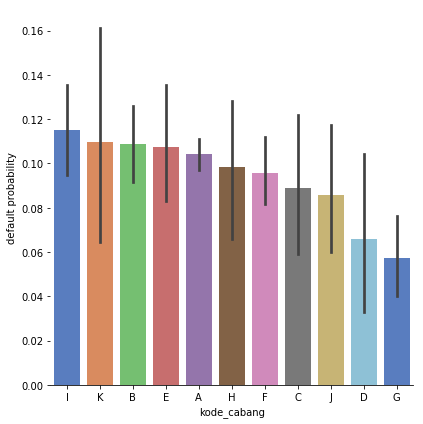

In [30]:
# g = sns.factorplot(x="kode_cabang",y="flag_kredit_macet",
#                    data=train,kind="bar", size = 6, 
#                    palette = "muted", estimator=np.mean,
#                   order=serCabang.sort_values(ascending=False).index)
g = sns.factorplot(x="kode_cabang",y="flag_kredit_macet",
                   data=train,kind="bar", size = 6, 
                   palette = "muted", estimator=np.mean,
                  order=train.groupby('kode_cabang').mean()['flag_kredit_macet'].sort_values(ascending=False).index)
g.despine(left=True)
g = g.set_ylabels("default probability")

In [31]:
# train = train.fillna('I')
train = train.fillna(train.groupby('kode_cabang').mean()['flag_kredit_macet'].sort_values(ascending=False).index[0])

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13459 entries, 0 to 15492
Data columns (total 24 columns):
id                                     13459 non-null int64
jumlah_kartu                           13459 non-null int64
outstanding                            13459 non-null int64
limit_kredit                           13459 non-null float64
tagihan                                13459 non-null float64
total_pemakaian_tunai                  13459 non-null float64
total_pemakaian_retail                 13459 non-null float64
sisa_tagihan_tidak_terbayar            13459 non-null float64
kode_cabang                            13459 non-null object
rasio_pembayaran                       13459 non-null float64
persentasi_overlimit                   13459 non-null float64
rasio_pembayaran_3bulan                13459 non-null float64
rasio_pembayaran_6bulan                13459 non-null float64
skor_delikuensi                        13459 non-null int64
flag_kredit_macet               

# EDA

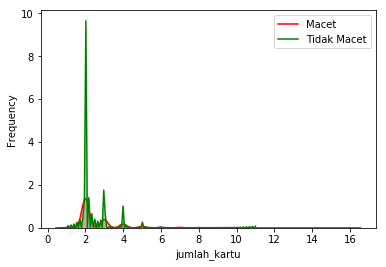

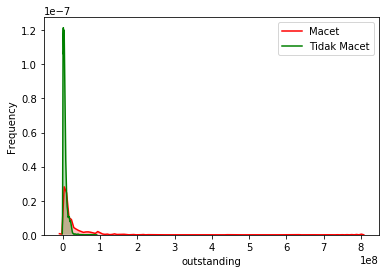

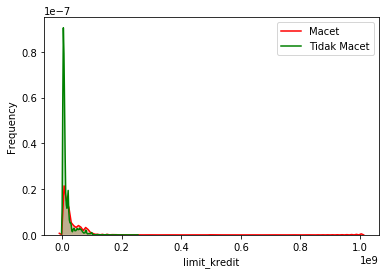

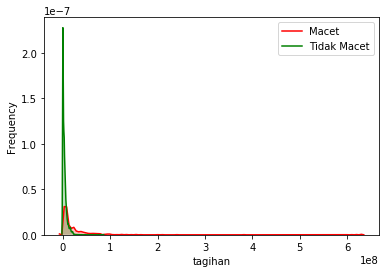

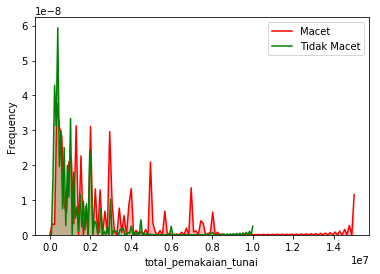

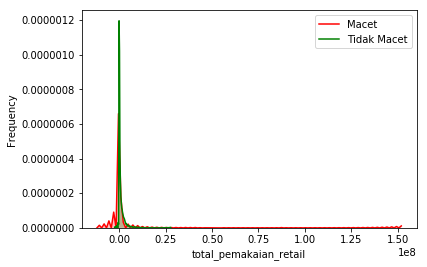

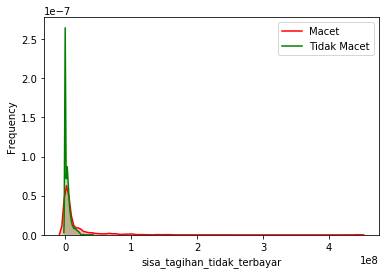

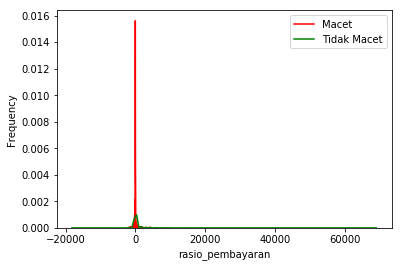

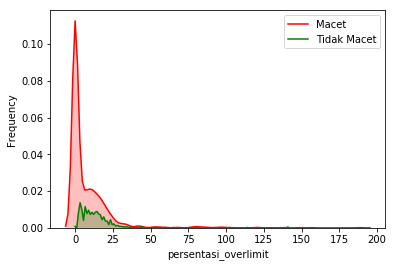

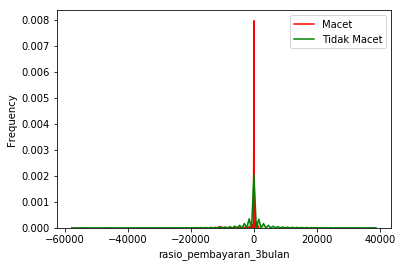

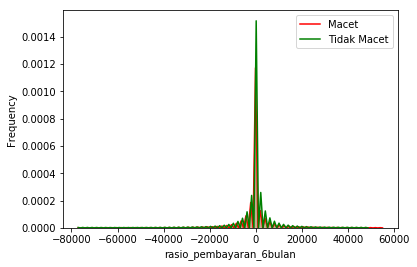

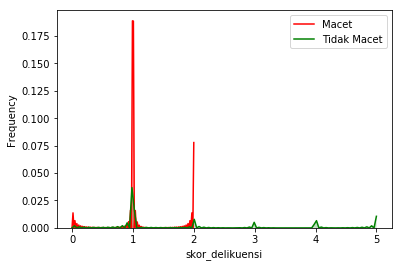

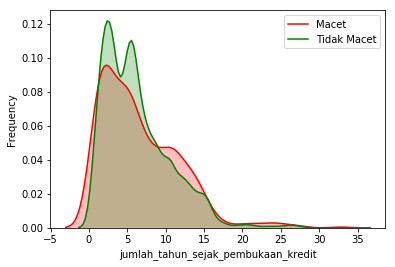

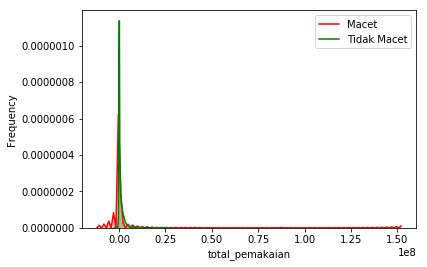

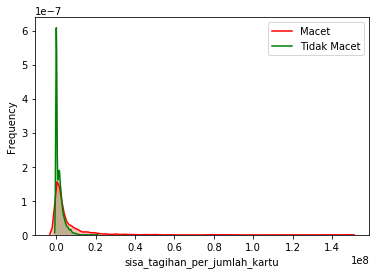

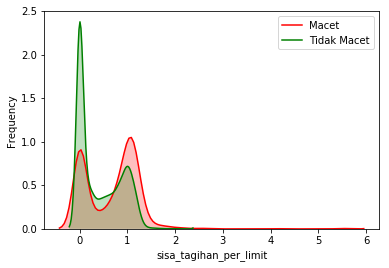

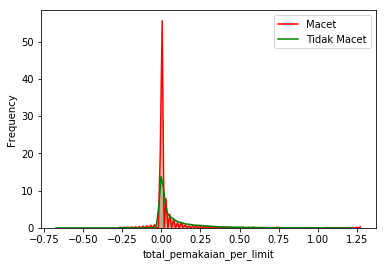

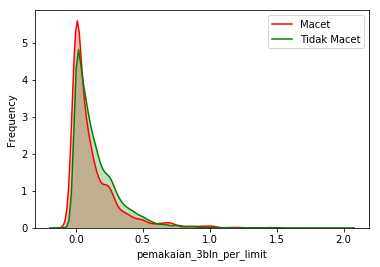

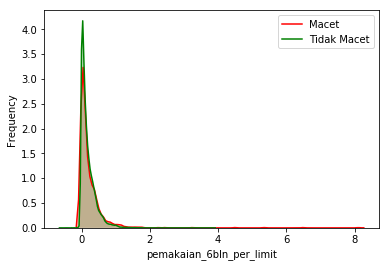

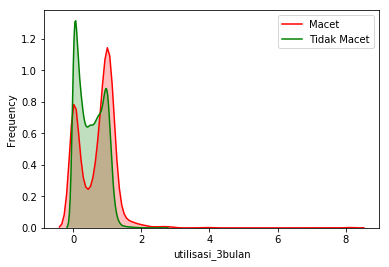

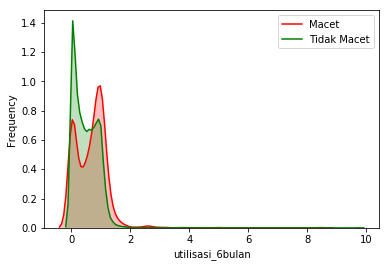

In [33]:
for col in train.drop(['id', 'flag_kredit_macet'], axis=1).select_dtypes(exclude=['object']).columns :
    # plt.figure(figsize=(10,6))
    g = sns.kdeplot(train[
        (train['flag_kredit_macet']==1) 
#       & (train[col] <= train[col].mean() + (3 * train[col].std()))
#       & (train[col] >= train[col].mean() - (3 * train[col].std()))
    ][col], color='red',shade=True)
    g = sns.kdeplot(train[
        (train['flag_kredit_macet']==0)
#       & (train[col] <= train[col].mean() + (3 * train[col].std()))
#       & (train[col] >= train[col].mean() - (3 * train[col].std()))
    ][col], color='green', shade=True)
    plt.legend(['Macet','Tidak Macet'])
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [34]:
train[
  (train['tagihan'] > train['tagihan'].mean() + (3 * train['tagihan'].std()))
]['flag_kredit_macet'].value_counts()

1    134
0     11
Name: flag_kredit_macet, dtype: int64

Text(0.5,0,'Outstanding')

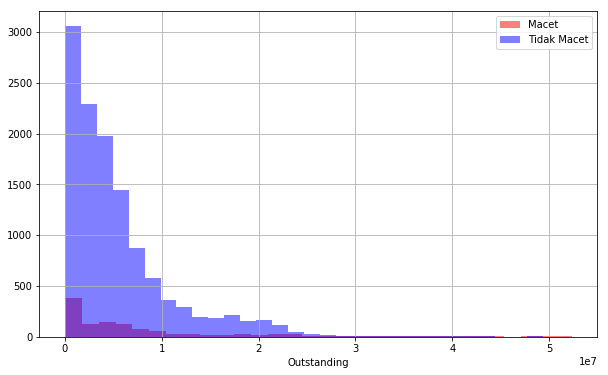

In [35]:
plt.figure(figsize=(10,6))
train[
    (train['flag_kredit_macet']==1) 
  & (train['outstanding'] <= train['outstanding'].mean() + (3 * train['outstanding'].std()))
  & (train['outstanding'] >= train['outstanding'].mean() - (3 * train['outstanding'].std()))
]['outstanding'].hist(alpha=0.5,color='red', bins=30,label='Macet')
train[
    (train['flag_kredit_macet']==0)
  & (train['outstanding'] <= train['outstanding'].mean() + (3 * train['outstanding'].std()))
  & (train['outstanding'] >= train['outstanding'].mean() - (3 * train['outstanding'].std()))
]['outstanding'].hist(alpha=0.5,color='blue',bins=30,label='Tidak Macet')
plt.legend()
plt.xlabel('Outstanding')

In [36]:
train[
  (train['outstanding'] > train['outstanding'].mean() + (3 * train['outstanding'].std()))
]['flag_kredit_macet'].value_counts()

1    134
0     12
Name: flag_kredit_macet, dtype: int64

Text(0.5,0,'Rasio Pembayaran')

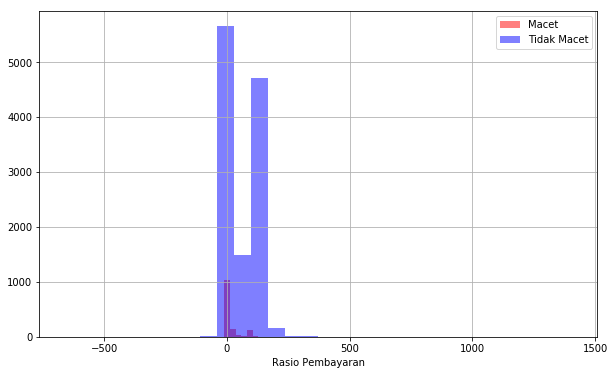

In [37]:
plt.figure(figsize=(10,6))
train[
    (train['flag_kredit_macet']==1) 
  & (train['rasio_pembayaran'] <= train['rasio_pembayaran'].mean() + (3 * train['rasio_pembayaran'].std()))
  & (train['rasio_pembayaran'] >= train['rasio_pembayaran'].mean() - (3 * train['rasio_pembayaran'].std()))
]['rasio_pembayaran'].hist(alpha=0.5,color='red', bins=30,label='Macet')
train[
    (train['flag_kredit_macet']==0)
  & (train['rasio_pembayaran'] <= train['rasio_pembayaran'].mean() + (3 * train['rasio_pembayaran'].std()))
  & (train['rasio_pembayaran'] >= train['rasio_pembayaran'].mean() - (3 * train['rasio_pembayaran'].std()))
]['rasio_pembayaran'].hist(alpha=0.5,color='blue',bins=30,label='Tidak Macet')
plt.legend()
plt.xlabel('Rasio Pembayaran')

In [38]:
train[
  (train['rasio_pembayaran'] < 0)
]['flag_kredit_macet'].value_counts()

0    21
1     4
Name: flag_kredit_macet, dtype: int64

In [39]:
train[
  (train['total_pemakaian_tunai'] > train['total_pemakaian_tunai'].mean() + (3 * train['total_pemakaian_tunai'].std()))
]['flag_kredit_macet'].value_counts()

0    133
1     35
Name: flag_kredit_macet, dtype: int64

In [40]:
train['total_pemakaian_tunai'].mean() + (25 * train['total_pemakaian_tunai'].std())

8887410.992085863

In [41]:
train[train['total_pemakaian_tunai'] > (train['total_pemakaian_tunai'].mean() + (25 * train['total_pemakaian_tunai'].std()))]

,id,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
1607,1608,3,77987704,90000000.0,47580392.0,15000000.0,0.0,75524675.0,A,0.0,0.0,53.08,53.81,0,1,13.083333,15000000.0,25174891.67,0.839163,0.166667,0.15958,0.240722,0.807937,0.823628
14963,14964,2,15708050,20000000.0,14775895.0,10000000.0,668100.0,14897060.0,A,22.1,0.0,11.80,13.80,0,0,1.000000,10668100.0,7448530.00,0.745000,0.533000,0.08700,0.067500,0.624000,0.616000


# Correcting Rasio Features

In [42]:
train['rasio_pembayaran'] = train['rasio_pembayaran'].apply(lambda ras : 0 if ras < 0 else ras)
train['rasio_pembayaran_3bulan'] = train['rasio_pembayaran_3bulan'].apply(lambda ras : 0 if ras < 0 else ras)
train['rasio_pembayaran_6bulan'] = train['rasio_pembayaran_6bulan'].apply(lambda ras : 0 if ras < 0 else ras)

In [43]:
train.describe()

,id,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
count,13459.000000,13459.000000,1.345900e+04,1.345900e+04,1.345900e+04,1.345900e+04,1.345900e+04,1.345900e+04,13459.000000,13459.000000,13459.000000,13459.000000,13459.000000,13459.000000,13459.000000,1.345900e+04,1.345900e+04,13459.000000,13459.000000,13459.000000,13459.000000,13459.000000,13459.000000
mean,7720.642098,2.376402,6.859532e+06,1.600479e+07,4.875820e+06,4.459329e+04,8.984658e+05,4.822436e+06,60.379597,2.934699,69.934091,91.196396,0.005498,0.100973,6.293546,9.430591e+05,1.931639e+06,0.442446,0.086310,0.148454,0.184162,0.539295,0.509423
std,4475.033870,0.795904,1.528072e+07,2.395373e+07,1.136996e+07,3.537127e+05,2.561418e+06,1.242972e+07,629.464282,8.385325,481.980667,863.396062,0.122390,0.301305,4.429554,2.585494e+06,4.103413e+06,0.463139,0.157144,0.163793,0.248340,0.402185,0.417610
min,1.000000,1.000000,0.000000e+00,3.000000e+06,2.004300e+04,0.000000e+00,-1.200000e+07,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,-1.200000e+07,0.000000e+00,0.000000,-0.632000,-0.126000,-0.569000,0.000288,0.000000
25%,3839.500000,2.000000,1.571995e+06,5.000000e+06,6.569765e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,20.400000,21.400000,0.000000,0.000000,2.830000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.027800,0.026300,0.154000,0.130000
50%,7705.000000,2.000000,3.850823e+06,8.000000e+06,2.612858e+06,0.000000e+00,1.095000e+05,2.255200e+06,26.600000,0.000000,50.000000,64.200000,0.000000,0.000000,5.420000,1.490000e+05,9.797560e+05,0.262090,0.013900,0.096300,0.106796,0.524000,0.464000
75%,11611.500000,3.000000,7.499576e+06,1.900000e+07,5.537610e+06,0.000000e+00,9.029000e+05,5.586080e+06,100.000000,0.000000,88.650000,100.000000,0.000000,0.000000,8.670000,1.000000e+06,2.480130e+06,0.900000,0.102000,0.218750,0.264500,0.894000,0.842000
max,15493.000000,16.000000,7.980586e+08,1.000000e+09,6.280000e+08,1.500000e+07,1.520000e+08,4.440000e+08,68983.000000,189.000000,38828.000000,54899.000000,5.000000,1.000000,32.900000,1.520000e+08,1.480000e+08,5.530000,1.270000,2.010000,8.110000,8.125671,9.730000


In [44]:
train[train['rasio_pembayaran'] > 3000]['flag_kredit_macet'].value_counts()

0    13
1     1
Name: flag_kredit_macet, dtype: int64

# Clamp Transformation 

In [45]:
# batasMaxRas = train[train['rasio_pembayaran'] < 3000]['rasio_pembayaran'].mean() + (2 * train[train['rasio_pembayaran'] < 3000]['rasio_pembayaran'].std())
# batasMaxRas3 = train[train['rasio_pembayaran_3bulan'] < 3000]['rasio_pembayaran_3bulan'].mean() + (2 * train[train['rasio_pembayaran_3bulan'] < 3000]['rasio_pembayaran_3bulan'].std())
# batasMaxRas6 = train[train['rasio_pembayaran_6bulan'] < 3000]['rasio_pembayaran_6bulan'].mean() + (2 * train[train['rasio_pembayaran_6bulan'] < 3000]['rasio_pembayaran_6bulan'].std())
dictBatasMaxRas = {}
for col in ['rasio_pembayaran','rasio_pembayaran_3bulan','rasio_pembayaran_6bulan'] :
    # 1st quartile (25%)
    Q1 = np.percentile(train[col], 25)

    # 3rd quartile (75%)
    Q3 = np.percentile(train[col],75)

    # Interquartile range (IQR)
    IQR = Q3 - Q1

    # outlier step
    outlier_step = 1.5 * IQR
    dictBatasMaxRas[col] = Q3 + outlier_step

In [46]:
# train['rasio_pembayaran'] = train['rasio_pembayaran'].apply(
#     lambda ras : batasMaxRas if ras > batasMaxRas else ras
# )
# train['rasio_pembayaran_3bulan'] = train['rasio_pembayaran_3bulan'].apply(
#     lambda ras : batasMaxRas3 if ras > batasMaxRas3 else ras
# )
# train['rasio_pembayaran_6bulan'] = train['rasio_pembayaran_6bulan'].apply(
#     lambda ras : batasMaxRas6 if ras > batasMaxRas6 else ras
# )
for col in ['rasio_pembayaran','rasio_pembayaran_3bulan','rasio_pembayaran_6bulan'] :
    train[col] = train[col].apply(lambda ras : dictBatasMaxRas[col] if ras > dictBatasMaxRas[col] else ras)

In [47]:
train.describe()

,id,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
count,13459.000000,13459.000000,1.345900e+04,1.345900e+04,1.345900e+04,1.345900e+04,1.345900e+04,1.345900e+04,13459.000000,13459.000000,13459.000000,13459.000000,13459.000000,13459.000000,13459.000000,1.345900e+04,1.345900e+04,13459.000000,13459.000000,13459.000000,13459.000000,13459.000000,13459.000000
mean,7720.642098,2.376402,6.859532e+06,1.600479e+07,4.875820e+06,4.459329e+04,8.984658e+05,4.822436e+06,49.212973,2.934699,55.044938,62.362132,0.005498,0.100973,6.293546,9.430591e+05,1.931639e+06,0.442446,0.086310,0.148454,0.184162,0.539295,0.509423
std,4475.033870,0.795904,1.528072e+07,2.395373e+07,1.136996e+07,3.537127e+05,2.561418e+06,1.242972e+07,49.823819,8.385325,38.795547,43.677291,0.122390,0.301305,4.429554,2.585494e+06,4.103413e+06,0.463139,0.157144,0.163793,0.248340,0.402185,0.417610
min,1.000000,1.000000,0.000000e+00,3.000000e+06,2.004300e+04,0.000000e+00,-1.200000e+07,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,-1.200000e+07,0.000000e+00,0.000000,-0.632000,-0.126000,-0.569000,0.000288,0.000000
25%,3839.500000,2.000000,1.571995e+06,5.000000e+06,6.569765e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,20.400000,21.400000,0.000000,0.000000,2.830000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.027800,0.026300,0.154000,0.130000
50%,7705.000000,2.000000,3.850823e+06,8.000000e+06,2.612858e+06,0.000000e+00,1.095000e+05,2.255200e+06,26.600000,0.000000,50.000000,64.200000,0.000000,0.000000,5.420000,1.490000e+05,9.797560e+05,0.262090,0.013900,0.096300,0.106796,0.524000,0.464000
75%,11611.500000,3.000000,7.499576e+06,1.900000e+07,5.537610e+06,0.000000e+00,9.029000e+05,5.586080e+06,100.000000,0.000000,88.650000,100.000000,0.000000,0.000000,8.670000,1.000000e+06,2.480130e+06,0.900000,0.102000,0.218750,0.264500,0.894000,0.842000
max,15493.000000,16.000000,7.980586e+08,1.000000e+09,6.280000e+08,1.500000e+07,1.520000e+08,4.440000e+08,250.000000,189.000000,191.025000,217.900000,5.000000,1.000000,32.900000,1.520000e+08,1.480000e+08,5.530000,1.270000,2.010000,8.110000,8.125671,9.730000


# Feature Engineering

In [48]:
def feature_engineering_jumlah_kartu(df):
    df['jumlah_kartu_total_sisa_tagihan_semua_kartu'] = df.apply(lambda x: x['jumlah_kartu'] * x[
        'sisa_tagihan_per_jumlah_kartu'], axis=1)
    return df
                                                                                                 
# def feature_engineering_outstanding(df):
#     df['jumlah_kartu_total_sisa_tagihan_semua_kartu'] = df.apply(lambda x: x['jumlah_kartu'] * x[
#         'sisa_tagihan_per_jumlah_kartu'], axis=1)
#     return df
                                                                                                 
def feature_engineering_limit_kredit(df):
    df['limit_kredit_per_jumlah_kartu'] = df.apply(lambda x: x['limit_kredit'] / x['jumlah_kartu'], 
                                                   axis=1)
    df['limit_kredit_overlimit_maksimum'] = df.apply(lambda x: x['limit_kredit'] + (x['limit_kredit'] 
                                                        * x['persentasi_overlimit']), axis=1)
    df['limit_kredit_total_sisa_tagihan_semua_limit'] = df.apply(lambda x: x['limit_kredit'] * x[
        'sisa_tagihan_per_limit'], axis=1)
    return df
                                                                                                 
def feature_engineering_jumlah_tahun_sejak_pembukaan_kredit(df):
    df['jumlah_tahun_sejak_pembukaan_kredit_average_quarter_utilization'] = df.apply(lambda x: x[
        'jumlah_tahun_sejak_pembukaan_kredit'] * 4 * x['utilisasi_3bulan'], axis=1)
    df['jumlah_tahun_sejak_pembukaan_kredit_average_semester_utilization'] = df.apply(lambda x: x[
        'jumlah_tahun_sejak_pembukaan_kredit'] * 2 * x['utilisasi_6bulan'], axis=1)
    df['jumlah_tahun_sejak_pembukaan_kredit_average_quarter_utilization_per_limit'] = df.apply(
        lambda x: x['jumlah_tahun_sejak_pembukaan_kredit'] * 4 * x['pemakaian_3bln_per_limit'], axis=1)
    df['jumlah_tahun_sejak_pembukaan_kredit_average_semester_utilization_per_limit'] = df.apply(
        lambda x: x['jumlah_tahun_sejak_pembukaan_kredit'] * 2 * x['pemakaian_6bln_per_limit'], axis=1)
    df['jumlah_tahun_sejak_pembukaan_kredit_rata_rata_waktu_pembukaan_kredit'] = df.apply(lambda x: x[
        'jumlah_tahun_sejak_pembukaan_kredit'] / x['jumlah_kartu'], axis=1)
    return df
                                                                                                      
def feature_engineering_persentasi_overlimit(df):
    df['persentasi_overlimit_excess'] = df.apply(lambda x: x['persentasi_overlimit'] * 
                                                 x['limit_kredit'], axis=1)
    return df
                                                                                                      
def feature_engineering_total_pemakaian(df):
    df['total_pemakaian_tunai_retail'] = df.apply(
        lambda x: x['total_pemakaian_tunai'] + x['total_pemakaian_retail'], axis=1)
    df['total_pemakaian_per_limit_kredit'] = df.apply(
        lambda x: x['total_pemakaian'] / x['limit_kredit'], axis=1)
    df['total_pemakaian_per_jumlah_kartu'] = df.apply(
        lambda x: x['total_pemakaian'] / x['jumlah_kartu'], axis=1)
    df['total_pemakaian_unexpected'] = df.apply(
        lambda x: 1 if x['total_pemakaian'] <= 0.00 and x['total_pemakaian_tunai'] <= 0.00 and 
        x['total_pemakaian_retail'] <= 0.00 else 0, axis=1)
    return df
                                                                                                  
def feature_engineering_tagihan(df):
    df['tagihan_terbayar'] = df.apply(lambda x: x['tagihan'] - x['sisa_tagihan_tidak_terbayar'], axis=1)
    df['tagihan_per_limit_kredit'] = df.apply(lambda x: x['tagihan'] / x['limit_kredit'], axis=1)
    df['sisa_tagihan_tidak_terbayar_percentage'] = df.apply(lambda x: x['sisa_tagihan_tidak_terbayar']
                                                           / x['tagihan'], axis=1)
    return df
                                                                                                  
def feature_engineering_sisa_tagihan(df):
    df['tagihan_per_jumlah_kartu'] = df.apply(lambda x: x['tagihan'] / x['jumlah_kartu'], axis=1)
    return df
                                                                                                  
def feature_engineering_utilisasi_3bulan(df):
    df['utilisasi_3bln_per_jumlah_kartu'] = df.apply(lambda x: x['utilisasi_3bulan'] / 
                                                     x['jumlah_kartu'], axis=1)
    return df
                                                                                                  
def feature_engineering_utilisasi_6bulan(df):
    df['utilisasi_6bln_per_jumlah_kartu'] = df.apply(lambda x: x['utilisasi_6bulan'] / 
                                                     x['jumlah_kartu'], axis=1)
    return df

In [49]:
train = feature_engineering_jumlah_kartu(train)
# train = feature_engineering_outstanding(train)
train = feature_engineering_limit_kredit(train)
train = feature_engineering_jumlah_tahun_sejak_pembukaan_kredit(train)
train = feature_engineering_persentasi_overlimit(train)
train = feature_engineering_total_pemakaian(train)
train = feature_engineering_tagihan(train)
train = feature_engineering_sisa_tagihan(train)
train = feature_engineering_utilisasi_3bulan(train)
train = feature_engineering_utilisasi_6bulan(train)

# One Hot Encoding Category Variables

In [50]:
# skordelikuensi = pd.get_dummies(train['skor_delikuensi'], drop_first=True)
# kode = pd.get_dummies(train['kode_cabang'], drop_first=True)
# train.drop(['skor_delikuensi','kode_cabang'],axis=1,inplace=True)
# train = pd.concat([train,skordelikuensi,kode],axis=1)
# train.head()
train = pd.get_dummies(train, drop_first=True, columns=['kode_cabang','skor_delikuensi'])
train.head()

,id,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan,kode_cabang_B,kode_cabang_C,kode_cabang_D,kode_cabang_E,kode_cabang_F,kode_cabang_G,kode_cabang_H,kode_cabang_I,kode_cabang_J,kode_cabang_K,skor_delikuensi_1,skor_delikuensi_2,skor_delikuensi_3,skor_delikuensi_4,skor_delikuensi_5
0,1,2,36158,7000000.0,23437.0,0.0,94.0,26323.0,102.19,0.0,74.78,100.00,0,15.416667,94.0,13161.5,0.003760,0.000013,0.011719,0.017810,0.013228,0.021949,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2,2,268691,10000000.0,254564.0,0.0,1012.0,0.0,0.00,0.0,0.00,0.00,0,0.750000,1012.0,0.0,0.000000,0.000101,0.000000,0.000000,0.004232,0.000300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,3,6769149,28000000.0,4159779.0,0.0,0.0,0.0,100.00,0.0,100.00,100.91,0,10.750000,0.0,0.0,0.000000,0.000000,0.040518,0.047703,0.249389,0.267853,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,4,3496732,21000000.0,111231.0,0.0,2536660.0,581334.0,100.00,0.0,25.01,22.64,0,19.750000,2536660.0,145333.5,0.027683,0.120793,0.055971,0.016851,0.101912,0.346635,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,5,2,9402085,10000000.0,6099283.0,0.0,2666558.0,5951865.0,95.99,0.0,97.49,99.84,0,1.666667,2666558.0,2975932.5,0.595186,0.266656,0.323027,0.131162,0.707865,0.336571,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13459 entries, 0 to 15492
Data columns (total 37 columns):
id                                     13459 non-null int64
jumlah_kartu                           13459 non-null int64
outstanding                            13459 non-null int64
limit_kredit                           13459 non-null float64
tagihan                                13459 non-null float64
total_pemakaian_tunai                  13459 non-null float64
total_pemakaian_retail                 13459 non-null float64
sisa_tagihan_tidak_terbayar            13459 non-null float64
rasio_pembayaran                       13459 non-null float64
persentasi_overlimit                   13459 non-null float64
rasio_pembayaran_3bulan                13459 non-null float64
rasio_pembayaran_6bulan                13459 non-null float64
flag_kredit_macet                      13459 non-null int64
jumlah_tahun_sejak_pembukaan_kredit    13459 non-null float64
total_pemakaian                

# Train Test Split

In [52]:
data = train.drop(['id','flag_kredit_macet'], axis=1)
target = train['flag_kredit_macet']

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,target,
                                                    test_size=0.30, random_state=101)

# Model Creation

### a. Random Forest

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score

In [3]:
rfc = RandomForestClassifier(n_estimators=100, random_state=101)

In [4]:
rfc.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [1]:
predict = rfc.predict(xtr)
predictProb = rfc.predict_proba(xtr)

NameError: name 'rfc' is not defined

In [58]:
print(confusion_matrix(xtr, predict))
print(classification_report(xtr, predict))
print('ROC AUC Score = ' + str(roc_auc_score(ytr, predictProb[:,1])))

[[3606   47]
 [ 271  114]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      3653
           1       0.71      0.30      0.42       385

   micro avg       0.92      0.92      0.92      4038
   macro avg       0.82      0.64      0.69      4038
weighted avg       0.91      0.92      0.91      4038

ROC AUC Score = 0.8763496290186681


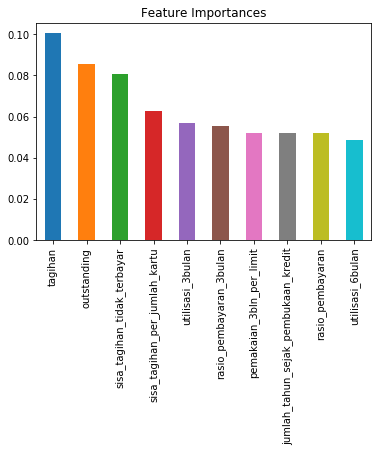

In [59]:
coef1 = pd.Series(rfc.feature_importances_, X_train.columns).sort_values(ascending = False).head(10)
coef1.plot(kind='bar', title='Feature Importances')

# Gridsearch

In [60]:
# from sklearn.model_selection import GridSearchCV

# parameters = {'class_weight':({0:1, 1:2},{0:1, 1:3},{0:1, 1:10}),
#              'min_samples_leaf': (5,10,15)}
# rfc = RandomForestClassifier(n_estimators=100, random_state=101)
# dt = GridSearchCV(rfc, parameters, 
#                   scoring = ['roc_auc','recall'],
#                   refit='recall',cv=5)
# dt.fit(X_train, y_train)
# dt.best_estimator_

In [61]:
rfc = RandomForestClassifier(n_estimators=100, random_state=101, 
                             class_weight={0:1, 1:10}, min_samples_leaf=15)

In [62]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 10},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=15,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=False,
            random_state=101, verbose=0, warm_start=False)

In [63]:
predict = rfc.predict(X_test)
predictProb = rfc.predict_proba(X_test)

In [64]:
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))
print('ROC AUC Score = ' + str(roc_auc_score(y_test, predictProb[:,1])))

[[3062  591]
 [ 113  272]]
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      3653
           1       0.32      0.71      0.44       385

   micro avg       0.83      0.83      0.83      4038
   macro avg       0.64      0.77      0.67      4038
weighted avg       0.90      0.83      0.85      4038

ROC AUC Score = 0.8741265851586136


# Oversampling

In [65]:
from imblearn.over_sampling import RandomOverSampler,SMOTE

In [66]:
y_train.value_counts()

0    8447
1     974
Name: flag_kredit_macet, dtype: int64

In [67]:
ros = RandomOverSampler(random_state=101)
# smot = SMOTE(random_state=101)

X_ros, y_ros = ros.fit_sample(X_train, y_train)
# X_smot, y_smot = smot.fit_sample(X_train, y_train)

In [68]:
pd.Series(y_ros).value_counts()
# pd.Series(y_smot).value_counts()

1    8447
0    8447
dtype: int64

In [69]:
rfc = RandomForestClassifier(n_estimators=100, random_state=101, min_samples_leaf=25)

In [70]:
rfc.fit(X_ros, y_ros)
# rfc.fit(X_smot, y_smot)
# rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=25, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=101, verbose=0, warm_start=False)

In [71]:
predict = rfc.predict(X_test)
predictProb = rfc.predict_proba(X_test)

In [72]:
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))
print('ROC AUC Score = ' + str(roc_auc_score(y_test, predictProb[:,1])))

[[3044  609]
 [ 111  274]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      3653
           1       0.31      0.71      0.43       385

   micro avg       0.82      0.82      0.82      4038
   macro avg       0.64      0.77      0.66      4038
weighted avg       0.90      0.82      0.85      4038

ROC AUC Score = 0.87578969073631


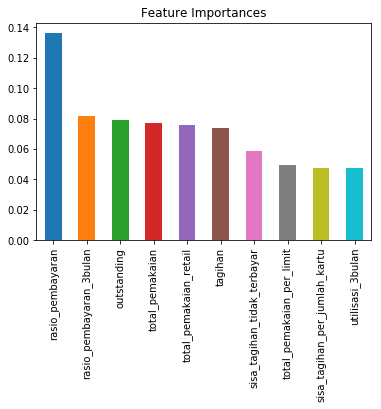

In [73]:
coef1 = pd.Series(rfc.feature_importances_, X_train.columns).sort_values(ascending = False).head(10)
coef1.plot(kind='bar', title='Feature Importances')

# Gradient Boosting Testing

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)

In [75]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [76]:
trainpredict = gbc.predict(X_train)
trainpredictProb = gbc.predict_proba(X_train)

In [77]:
print(confusion_matrix(y_train, trainpredict))
print(classification_report(y_train, trainpredict))
print('ROC AUC Score = ' + str(roc_auc_score(y_train, trainpredictProb[:,1])))

[[8413   34]
 [ 601  373]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      8447
           1       0.92      0.38      0.54       974

   micro avg       0.93      0.93      0.93      9421
   macro avg       0.92      0.69      0.75      9421
weighted avg       0.93      0.93      0.92      9421

ROC AUC Score = 0.9256007807104523


In [78]:
testpredict = gbc.predict(X_test)
testpredictProb = gbc.predict_proba(X_test)

In [79]:
print(confusion_matrix(y_test, testpredict))
print(classification_report(y_test, testpredict))
print('ROC AUC Score = ' + str(roc_auc_score(y_test, testpredictProb[:,1])))

[[3601   52]
 [ 276  109]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      3653
           1       0.68      0.28      0.40       385

   micro avg       0.92      0.92      0.92      4038
   macro avg       0.80      0.63      0.68      4038
weighted avg       0.90      0.92      0.90      4038

ROC AUC Score = 0.8714865205968408


# XGBoost Testing

In [80]:
from xgboost import XGBClassifier

In [81]:
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1)

In [82]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [83]:
trainpredict = xgb.predict(X_train)
trainpredictProb = xgb.predict_proba(X_train)

In [84]:
print(confusion_matrix(y_train, trainpredict))
print(classification_report(y_train, trainpredict))
print('ROC AUC Score = ' + str(roc_auc_score(y_train, trainpredictProb[:,1])))

[[8413   34]
 [ 636  338]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      8447
           1       0.91      0.35      0.50       974

   micro avg       0.93      0.93      0.93      9421
   macro avg       0.92      0.67      0.73      9421
weighted avg       0.93      0.93      0.91      9421

ROC AUC Score = 0.9198515006846653


In [85]:
testpredict = xgb.predict(X_test)
testpredictProb = xgb.predict_proba(X_test)

In [86]:
print(confusion_matrix(y_test, testpredict))
print(classification_report(y_test, testpredict))
print('ROC AUC Score = ' + str(roc_auc_score(y_test, testpredictProb[:,1])))

[[3617   36]
 [ 276  109]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      3653
           1       0.75      0.28      0.41       385

   micro avg       0.92      0.92      0.92      4038
   macro avg       0.84      0.64      0.68      4038
weighted avg       0.91      0.92      0.91      4038

ROC AUC Score = 0.8740437498444615
